In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

from pathlib import Path

import motorlab as ml
import yaml

In [3]:
os.chdir(Path().resolve().parent)

In [10]:
def get_config(experiment="gbyk"):
    if experiment == "gbyk":
        sessions = [
            "bex_20230621_spikes_sorted_SES",  # before
            "bex_20230624_spikes_sorted_SES",  # before
            "bex_20230629_spikes_sorted_SES",  # before
            "bex_20230630_spikes_sorted_SES",  # before
            "bex_20230701_spikes_sorted_SES",  # before
            "bex_20230708_spikes_sorted_SES",  # while
            # "ken_20230614_spikes_sorted_SES",  # while and before
            "ken_20230618_spikes_sorted_SES",  # before
            "ken_20230622_spikes_sorted_SES",  # while, before and free
            "ken_20230629_spikes_sorted_SES",  # while, before and free
            "ken_20230630_spikes_sorted_SES",  # while
            "ken_20230701_spikes_sorted_SES",  # before
            "ken_20230703_spikes_sorted_SES",  # while
        ]
    else:
        sessions = [
            "bex_20230221",
            "bex_20230222",
            "bex_20230223",
            "bex_20230224",
            "bex_20230225",
            "bex_20230226",
            "jon_20230125",
            "jon_20230126",
            "jon_20230127",
            "jon_20230130",
            "jon_20230131",
            "jon_20230202",
            "jon_20230203",
            "luk_20230126",
            "luk_20230127",
            "luk_20230130",
            "luk_20230131",
            "luk_20230202",
            "luk_20230203",
        ]

    config = {
        "DATA_DIR": f"data/{experiment}",
        "CHECKPOINT_DIR": "checkpoint/pose_and_spike_count_to_position",
        "CONFIG_DIR": "config/pose_and_spike_count_to_position",
        "save": True,
        "experiment": experiment,
        "include_trial": True,
        "include_homing": False,
        "in_modalities": "poses_spike_count",
        "out_modalities": "position",
        "architecture": "gru",
        "sessions": sessions,
        "position_repr": "com",
        "body_repr": "egocentric",
        "brain_area": "m1",
        "loss_fn": "mse",
        "metric": "mse",
        "model": {
            "embedding_dim": 256,
            "hidden_dim": 512,
            "n_layers": 1,
            "readout": "linear",
        },
        "train": {"n_epochs": 300, "lr": 5e-3},
        "track": {"metrics": True, "wandb": False, "save_checkpoint": True},
        "dataset": {"seq_length": 20, "stride": 20},
    }
    return config

In [11]:
ml.model.train(get_config())

GRUModel(
  (embedding): LinearEmbedding(
    (linear): ModuleDict(
      (bex_20230621_spikes_sorted_SES): Linear(in_features=134, out_features=256, bias=True)
      (bex_20230624_spikes_sorted_SES): Linear(in_features=135, out_features=256, bias=True)
      (bex_20230629_spikes_sorted_SES): Linear(in_features=132, out_features=256, bias=True)
      (bex_20230630_spikes_sorted_SES): Linear(in_features=134, out_features=256, bias=True)
      (bex_20230701_spikes_sorted_SES): Linear(in_features=134, out_features=256, bias=True)
      (bex_20230708_spikes_sorted_SES): Linear(in_features=128, out_features=256, bias=True)
      (ken_20230618_spikes_sorted_SES): Linear(in_features=158, out_features=256, bias=True)
      (ken_20230622_spikes_sorted_SES): Linear(in_features=145, out_features=256, bias=True)
      (ken_20230629_spikes_sorted_SES): Linear(in_features=149, out_features=256, bias=True)
      (ken_20230630_spikes_sorted_SES): Linear(in_features=150, out_features=256, bias=True)
  

In [ ]:
run = 20250701095048  # area: m1  | homing: false
run = 20250701080923  # area: pmd | homing: false

In [ ]:
run = None  # m1
run = 20250704073742  # pmd

In [55]:
CONFIG_DIR = Path(get_config()["CONFIG_DIR"])
CONFIG_PATH = CONFIG_DIR / f"{run}.yaml"

with open(CONFIG_PATH, "r") as f:
    config = yaml.safe_load(f)

# config["include_trial"] = True
# config["include_homing"] = False

# config["include_trial"] = False
# config["include_homing"] = True

# config["load_epoch"] = 75

eval_metrics, eval_gts, eval_preds = ml.model.evaluate(config)

for session in eval_preds:
    eval_gts[session] = eval_gts[session].reshape(-1, 2)
    eval_preds[session] = eval_preds[session].reshape(-1, 2)

In [ ]:
ml.plot.room_heatmap(eval_gts, eval_preds)

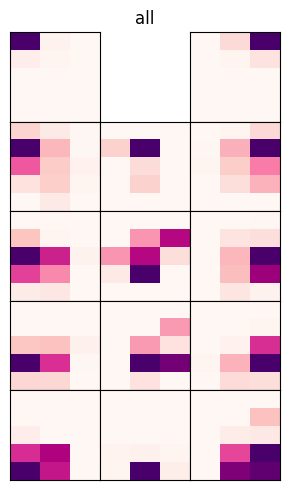

In [59]:
bex_gts = {
    session: gts for session, gts in eval_gts.items() if "bex" in session
}
bex_preds = {
    session: preds for session, preds in eval_preds.items() if "bex" in session
}
ml.plot.room_heatmap(bex_gts, bex_preds, concat=True)

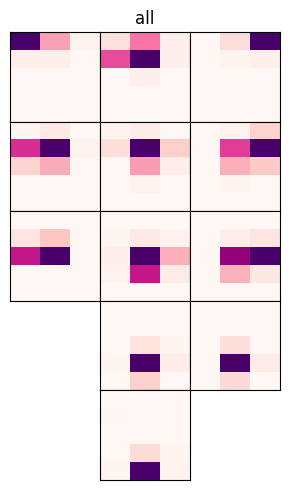

In [58]:
ken_gts = {
    session: gts for session, gts in eval_gts.items() if "ken" in session
}
ken_preds = {
    session: preds for session, preds in eval_preds.items() if "ken" in session
}
ml.plot.room_heatmap(ken_gts, ken_preds, concat=True)